# Clustering and Decomposition

In [1]:
import pandas as pd
import numpy as np
import sklearn as sc
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
from numpy.random import rand
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 10)

Populating the interactive namespace from numpy and matplotlib


In [2]:
data = pd.read_csv("../data/one_hot_items.csv")
data = data.drop("order_id", axis = 1)
pca = PCA(n_components=3)
data_pca = pca.fit_transform(data)

# Measure Performance
for k in xrange(8, 20):
    kmeans_model = KMeans(n_clusters=k, n_init=10, max_iter=300, tol=0.0001)


    kmeans_model.fit(data_pca)
    cluster = kmeans_model.predict(data_pca)

    sample_idxs = np.random.randint(1, data_pca.shape[0], 10000)
    
    print "k:", k
    print "calinski score", metrics.calinski_harabaz_score(data_pca, cluster) 
    print "silhouette score", metrics.silhouette_score(data_pca[sample_idxs, :],
                                                       cluster[sample_idxs],
                                                       metric='euclidean')

k: 8
calinski score 87684.01478532824
silhouette score 0.7499313892385415
k: 9
calinski score 98771.69612306
silhouette score

KeyboardInterrupt: 

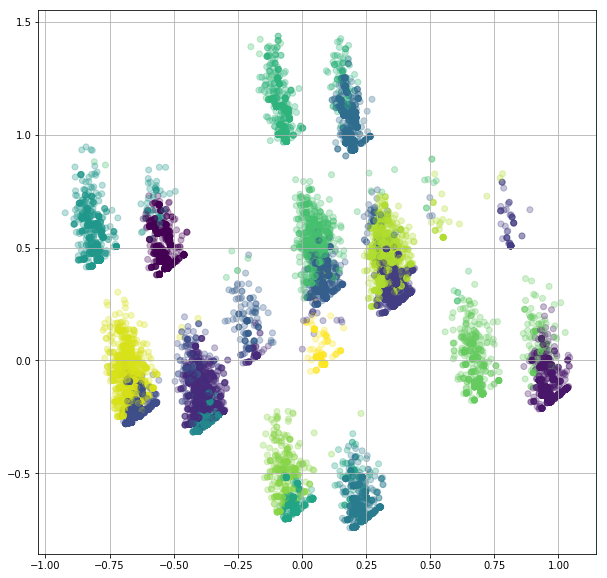

In [3]:
data = pd.read_csv("../data/one_hot_items.csv")
data = data.drop("order_id", axis = 1)

pca = PCA(n_components=3)
data_pca = pca.fit_transform(data)

kmeans_model = KMeans(n_clusters=18, n_init=10, max_iter=300, tol=0.0001)
kmeans_model.fit(data_pca)
cluster = kmeans_model.predict(data_pca)

fig, ax = plt.subplots()
ax.scatter(data_pca[:, 0], data_pca[:, 1], alpha=0.3, c = cluster)
#ax.set_xlim(-10, 30)
#ax.set_ylim(-10, 40)
ax.legend()
ax.grid(True)

plt.show()

In [4]:
data["cluster"] = cluster
data.to_csv("../data/items_with_clusters.csv", index = False)